### Multi-armed bandits with 𝜖-greedy action selection

You play against a 10-armed bandit, where at the beginning of each episode the true value 𝑞∗(𝑎), 𝑎 ∈ {1, … , 10}, of each of the 10 actions is chosen to be normally distributed with mean zero and unit variance. The rewards after choosing action/bandit 𝑎 are normally distributed with mean 𝑞∗(𝑎) and unit variance. Using the simple bandit algorithm and 𝜖-greedy action selection, you have 1000 time steps or tries in each
episode to maximize the average reward starting from zero knowledge about the bandits.
Which value of 𝜖 maximizes the average reward? Which value of 𝜖 maximizes the percentage of optimal actions taken?

In [1]:
using Statistics
using Plots

In [2]:
function mab(q, ε; epochs=1000)
    num_bandits = length(q)
    Q = zeros(num_bandits)
    N = ones(num_bandits)
    rewards = []
    actions = []
    
    for _ in 1:epochs
        if rand() > ε
            a = findmax(Q)[2]
        else
            a = rand(1:num_bandits)
        end        
        R = q[a] .+ randn()
        push!(rewards, R)
        push!(actions, a)
        N[a] += 1
        Q[a] += (R - Q[a])/N[a]
    end
    
    return rewards, actions, Q
end

mab (generic function with 1 method)

In [3]:
reward_dict = Dict()

N = 10
num_runs = 1000

for ε in [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1]
    mean_rewards = []
    for run in 1:num_runs
        q = randn(N)
        push!(mean_rewards, mean(mab(q, ε, epochs=1000)[1]))
    end
    
    reward_dict[ε] = mean_rewards 
end

In [4]:
reward_std = Dict(ε => std(reward_dict[ε]) for ε in keys(reward_dict))
reward_mean = Dict(ε => mean(reward_dict[ε]) for ε in keys(reward_dict))

Dict{Float64,Float64} with 8 entries:
  1.0       => 0.00125258
  0.0078125 => 1.14624
  0.015625  => 1.21058
  0.0625    => 1.2757
  0.5       => 0.749337
  0.03125   => 1.27508
  0.25      => 1.13012
  0.125     => 1.30132

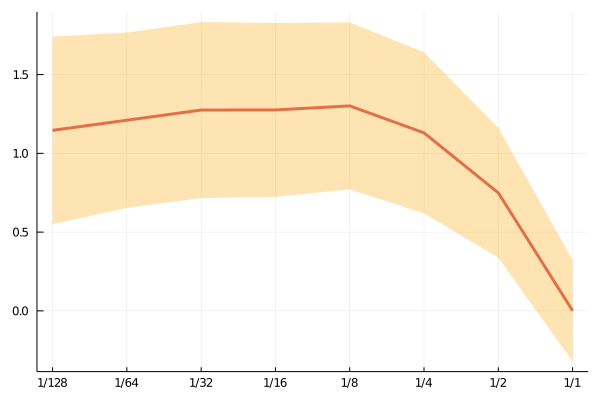

In [5]:
x = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1]
y_mean = [reward_mean[k] for k in x]
y_std = [reward_std[k] for k in x]

x_tics = ["1/$(num)" for num in [128, 64, 32, 16, 8, 4, 2, 1]]
plot(x, y_mean, xtick=(x, x_tics), xaxis=:log, legend=false)
plot!(x, y_mean, ribbon=y_std, fc=:orange, fa=0.3, linewidth=3)

In [6]:
action_dict = Dict()

N = 10
num_runs = 1000
epochs = 1000

for ε in [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1]
    correct_action_count = []
    for run in 1:num_runs
        q = randn(N)
        optimal_action = findmax(q)[2]
        
        actions = mab(q, ε, epochs=epochs)[2]
        correct_actions = length(filter(x -> x==optimal_action, actions))/epochs
        push!(correct_action_count, correct_actions)
    end
    
    action_dict[ε] = correct_action_count 
end

In [7]:
action_count_std = Dict(ε => std(action_dict[ε]) for ε in keys(action_dict))
action_count_means = Dict(ε => mean(action_dict[ε]) for ε in keys(action_dict))

Dict{Float64,Float64} with 8 entries:
  1.0       => 0.100667
  0.0078125 => 0.451418
  0.015625  => 0.496919
  0.0625    => 0.631112
  0.5       => 0.477481
  0.03125   => 0.570539
  0.25      => 0.633215
  0.125     => 0.673009

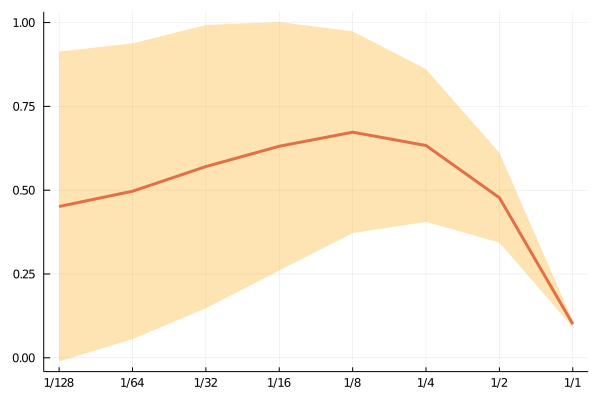

In [8]:
x = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1]
y_mean = [action_count_means[k] for k in x]
y_std = [action_count_std[k] for k in x]

x_tics = ["1/$(num)" for num in [128, 64, 32, 16, 8, 4, 2, 1]]
plot(x, y_mean, xtick=(x, x_tics), xaxis=:log, legend=false)
plot!(x, y_mean, ribbon=y_std, fc=:orange, fa=0.3, linewidth=3)